In [1]:
import pandas as pd


In [2]:
merged = pd.read_csv('merged_no_years.csv')

In [3]:
print(merged.columns)

Index(['Max AQI', 'ua_pop', 'tc_goal', 'treecanopy', 'tc_gap', 'priority_i',
       'pctpocnorm', 'pctpovnorm', 'unemplnorm', 'dep_perc', 'depratnorm',
       'lingnorm', 'health_nor', 'temp_norm', 'tesctyscor', 'child_perc',
       'seniorperc', 'land_area', 'biome'],
      dtype='object')


In [4]:
print(merged)

      Max AQI     ua_pop   tc_goal  treecanopy  tc_gap  priority_i  \
0   43.449036   769737.0  0.150000         NaN     NaN    0.419484   
1   32.800587   630366.0  0.446445         NaN     NaN    0.435847   
2   34.799342  1958685.0  0.481818         NaN     NaN    0.417424   
3   36.988858   327378.0  0.300000         NaN     NaN    0.376885   
4   35.195906   776256.0  0.473593         NaN     NaN    0.475231   
..        ...        ...       ...         ...     ...         ...   
57  57.676966   355816.0  0.150000         NaN     NaN    0.507325   
58  34.852459   217312.0  0.500000         NaN     NaN    0.343628   
59  47.901130  2688920.0  0.300000         NaN     NaN    0.428981   
60  35.528902   494087.0  0.364865         NaN     NaN    0.480917   
61  33.804281  1859595.0  0.500000         NaN     NaN    0.324967   

    pctpocnorm  pctpovnorm  unemplnorm  dep_perc  depratnorm  lingnorm  \
0     0.603916    0.352494    0.098893  0.374591    0.322593  0.080682   
1     0.660

In [5]:
df = merged.drop(['treecanopy', 'tc_gap'], axis = 1)


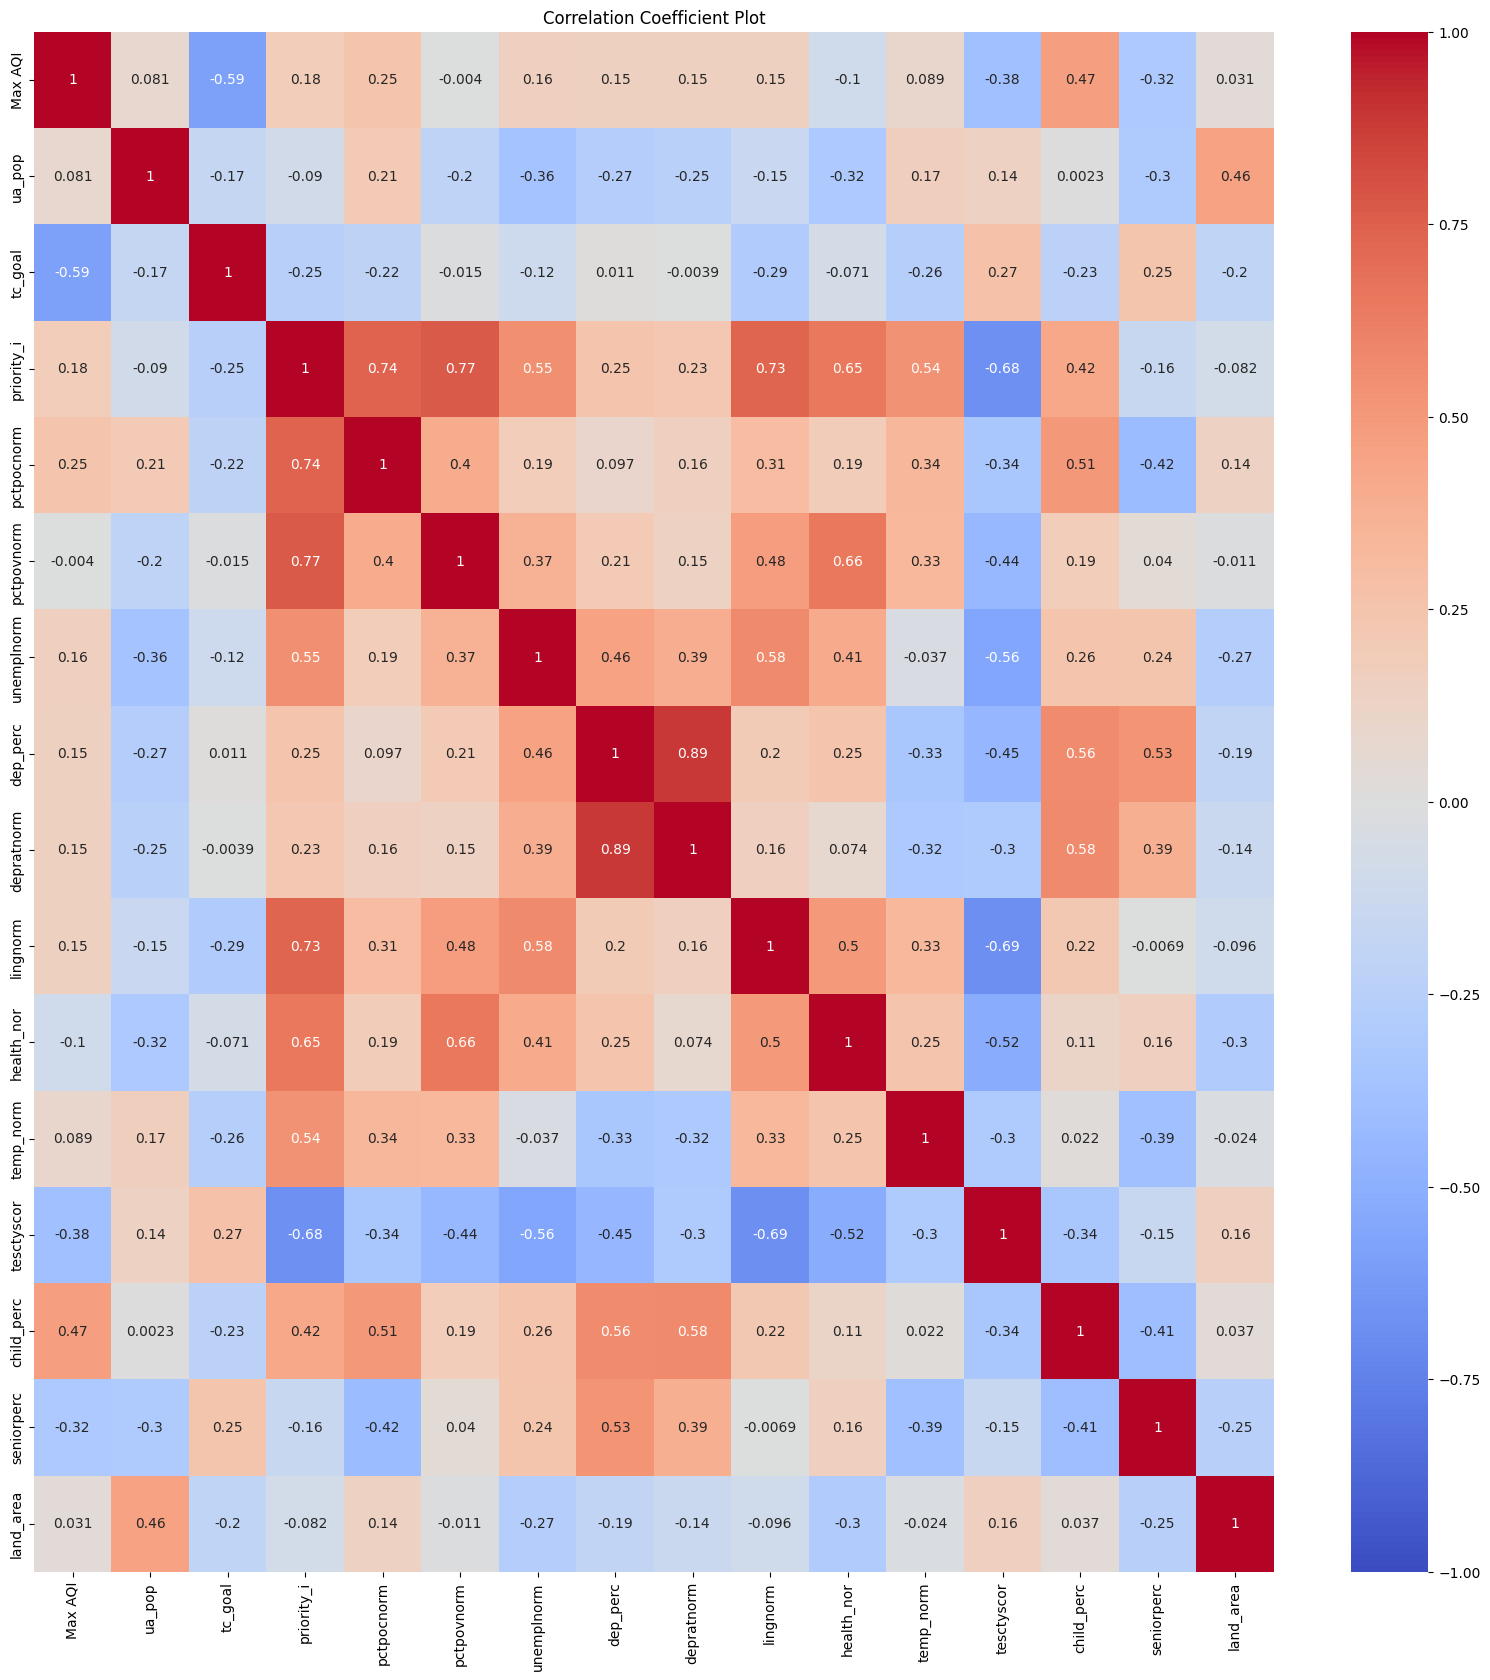

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Show the plot
plt.title("Correlation Coefficient Plot")
plt.show()

In [7]:
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
# Your Code Here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X, y = df.drop('Max AQI', axis=1) , df['Max AQI']



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [8]:
#encoding_map = X_train.join(y_train).groupby('City')['Max AQI'].mean().to_dict()
#X_train['City'] = X_train['City'].map(encoding_map)
#X_test['City'] = X_test['City'].map(encoding_map)
#encoding_map = X_train.join(y_train).groupby('State')['Max AQI'].mean().to_dict()
#X_train['State'] = X_train['State'].map(encoding_map)
#X_test['State'] = X_test['State'].map(encoding_map)
encoding_map = X_train.join(y_train).groupby('biome')['Max AQI'].mean().to_dict()
X_train['biome'] = X_train['biome'].map(encoding_map)
X_test['biome'] = X_test['biome'].map(encoding_map)


In [9]:
nan_counts = X_test.isna().sum()

print(nan_counts)
infinity_mask = np.isinf(X_test)
has_infinity = infinity_mask.any()

print(has_infinity)

ua_pop        0
tc_goal       0
priority_i    0
pctpocnorm    0
pctpovnorm    0
unemplnorm    0
dep_perc      0
depratnorm    0
lingnorm      0
health_nor    0
temp_norm     0
tesctyscor    0
child_perc    0
seniorperc    0
land_area     0
biome         0
dtype: int64
ua_pop        False
tc_goal       False
priority_i    False
pctpocnorm    False
pctpovnorm    False
unemplnorm    False
dep_perc      False
depratnorm    False
lingnorm      False
health_nor    False
temp_norm     False
tesctyscor    False
child_perc    False
seniorperc    False
land_area     False
biome         False
dtype: bool


In [10]:
print(X_train.columns) # remove 

Index(['ua_pop', 'tc_goal', 'priority_i', 'pctpocnorm', 'pctpovnorm',
       'unemplnorm', 'dep_perc', 'depratnorm', 'lingnorm', 'health_nor',
       'temp_norm', 'tesctyscor', 'child_perc', 'seniorperc', 'land_area',
       'biome'],
      dtype='object')


In [11]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')


In [12]:
# Train a model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
clf = XGBRegressor(random_state=42)
clf.fit(X_train, y_train)
print(4)
# Compute permutation feature importance
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)
columns = X_train.columns
# Display the feature importances
for i, imp in enumerate(result.importances_mean):
    print(f"Feature {columns[i]} - Importance: {imp}")

4
Feature ua_pop - Importance: 0.07615265006459619
Feature tc_goal - Importance: 0.25561296702771696
Feature priority_i - Importance: 0.0207458477909333
Feature pctpocnorm - Importance: 0.007346344654017567
Feature pctpovnorm - Importance: 0.06332725509072674
Feature unemplnorm - Importance: -0.0009554670643552976
Feature dep_perc - Importance: 0.008107135503687527
Feature depratnorm - Importance: -0.10869057982358547
Feature lingnorm - Importance: 0.001003726438418917
Feature health_nor - Importance: 0.01247114229134488
Feature temp_norm - Importance: 0.012458067631666311
Feature tesctyscor - Importance: 0.0005708182823336627
Feature child_perc - Importance: 0.7053122781913993
Feature seniorperc - Importance: -0.0100661677297877
Feature land_area - Importance: 0.0022931233857889904
Feature biome - Importance: 0.09098660353835258


In [13]:
y_pred = clf.predict(X_test)
print(y_pred)
print()

[32.495636 36.031384 45.480427 64.946144 33.663143 33.402573 34.43607
 34.84999  35.31168  31.288189 35.003696 34.798992 45.62252  40.487663
 45.6563   36.203007]



In [14]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print(score)

0.4278108684064157


In [15]:
print(X_train.columns)

Index(['ua_pop', 'tc_goal', 'priority_i', 'pctpocnorm', 'pctpovnorm',
       'unemplnorm', 'dep_perc', 'depratnorm', 'lingnorm', 'health_nor',
       'temp_norm', 'tesctyscor', 'child_perc', 'seniorperc', 'land_area',
       'biome'],
      dtype='object')


In [16]:
# Train a model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
clf = RandomForestRegressor(random_state=42)
clf.fit(X_train, y_train)
print(4)
# Compute permutation feature importance
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)
columns = X_train.columns
# Display the feature importances
for i, imp in enumerate(result.importances_mean):
    print(f"Feature {columns[i]} - Importance: {imp}")

4
Feature ua_pop - Importance: 0.008104420883937353
Feature tc_goal - Importance: 0.44059301287591773
Feature priority_i - Importance: 0.005327726024365875
Feature pctpocnorm - Importance: 0.00017172430147889274
Feature pctpovnorm - Importance: -0.0018973829618352627
Feature unemplnorm - Importance: -0.003802321545470137
Feature dep_perc - Importance: -0.007358237842516705
Feature depratnorm - Importance: -0.0699188631088358
Feature lingnorm - Importance: -0.022063947112631176
Feature health_nor - Importance: 0.0008417216240672413
Feature temp_norm - Importance: -0.0002639115314486055
Feature tesctyscor - Importance: 0.005750054432695513
Feature child_perc - Importance: 0.18878885740065993
Feature seniorperc - Importance: 0.24039318226346593
Feature land_area - Importance: -0.005742258922062826
Feature biome - Importance: 0.05374587086407496


In [17]:
y_pred = clf.predict(X_test)
print(y_pred)
print()

[32.30094362 38.16885852 45.06386384 52.75906352 34.15688706 39.57378338
 34.54334883 34.81883278 34.36475626 38.74083889 34.51341372 35.42652142
 43.65722128 39.78671453 43.23683407 34.67739567]



In [18]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print(score)

0.6157937209438384
